## Loan Prediction 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as mso
import seaborn as sns
from scipy import stats


In [3]:
from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import ttest_ind
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [4]:
df = pd.read_csv("./archive/loan-train.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df.shape

(614, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
df.Loan_ID.value_counts(dropna=False)


Loan_ID
LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: count, Length: 614, dtype: int64

In [8]:
df.Gender.value_counts(dropna=False)

Gender
Male      489
Female    112
NaN        13
Name: count, dtype: int64

# Data Visualization

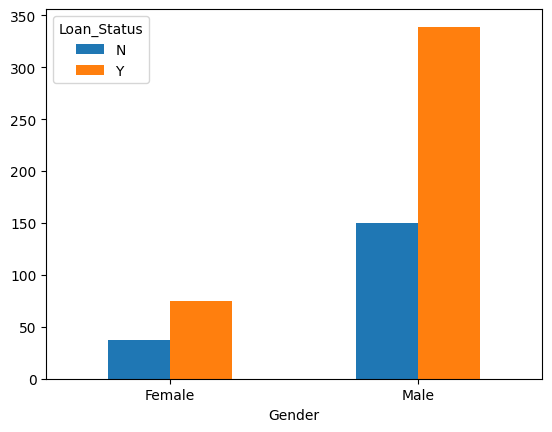

In [9]:
crosstb = pd.crosstab(df.Gender, df.Loan_Status)
barplot = crosstb.plot.bar(rot=0)

In [10]:
df.Married.value_counts(dropna=False)

Married
Yes    398
No     213
NaN      3
Name: count, dtype: int64

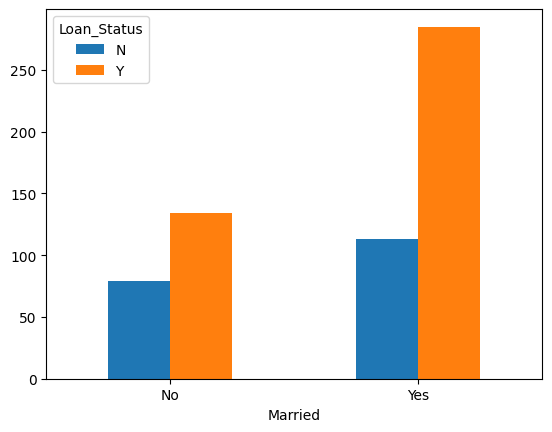

In [11]:
crosstb = pd.crosstab(df.Married, df.Loan_Status)
barplot = crosstb.plot.bar(rot=0)

In [13]:
df.Education.value_counts(dropna=False)


Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

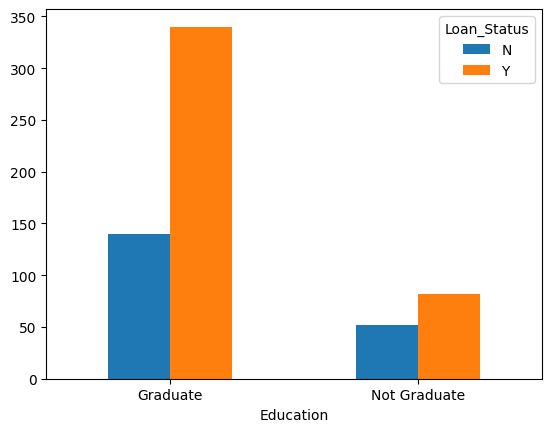

In [12]:
crosstb = pd.crosstab(df.Education, df.Loan_Status)
barplot = crosstb.plot.bar(rot=0)

In [15]:
df.Self_Employed.value_counts(dropna=False)


Self_Employed
No     500
Yes     82
NaN     32
Name: count, dtype: int64

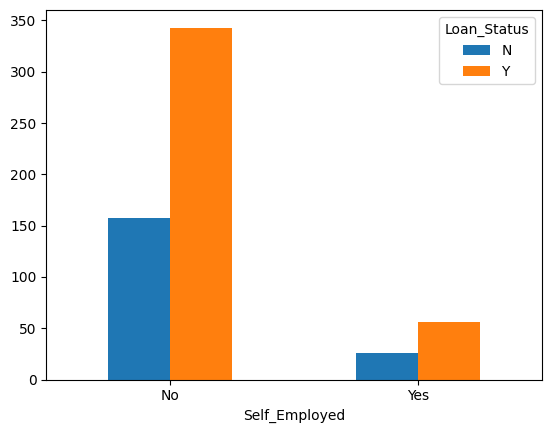

In [13]:
crosstb = pd.crosstab(df.Self_Employed, df.Loan_Status)
barplot = crosstb.plot.bar(rot=0)

In [14]:
df.Credit_History.value_counts(dropna=False)


Credit_History
1.0    475
0.0     89
NaN     50
Name: count, dtype: int64

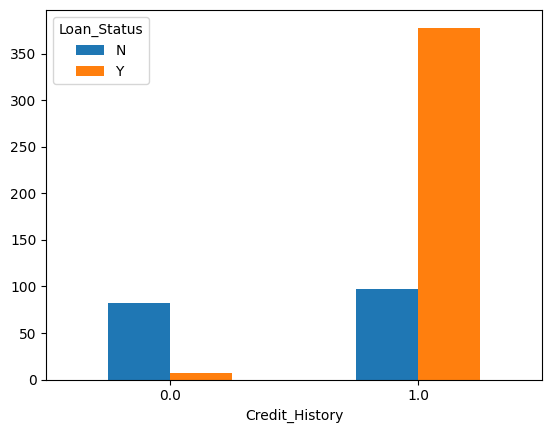

In [15]:
crosstb = pd.crosstab(df.Credit_History, df.Loan_Status)
barplot = crosstb.plot.bar(rot=0)

In [19]:
df.Property_Area.value_counts(dropna=False)


Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

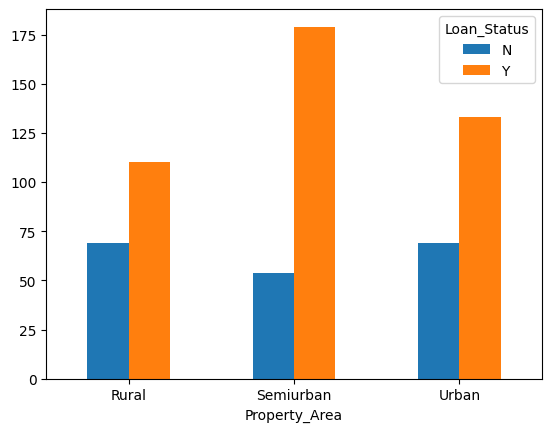

In [16]:
crosstb = pd.crosstab(df.Property_Area, df.Loan_Status)
barplot = crosstb.plot.bar(rot=0)

In [21]:
df.Loan_Status.value_counts(dropna=False)


Loan_Status
Y    422
N    192
Name: count, dtype: int64

C:\Users\sansk\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sansk\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sansk\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


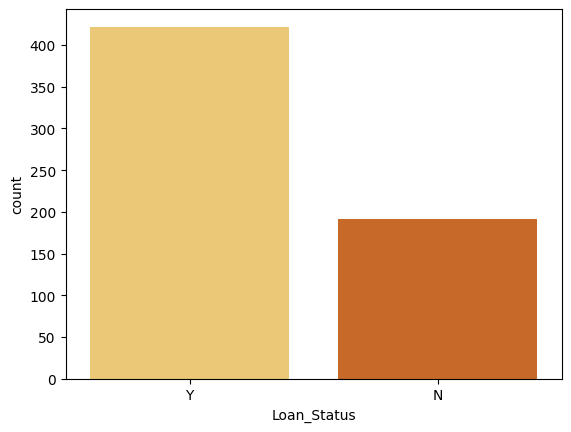

In [22]:
sns.countplot(x="Loan_Status", data=df, palette="YlOrBr")
plt.show()

In [23]:
df.Loan_Amount_Term.value_counts(dropna=False)


Loan_Amount_Term
360.0    512
180.0     44
480.0     15
NaN       14
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

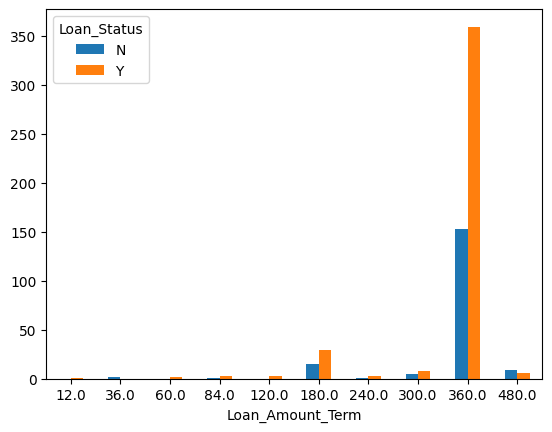

In [18]:
crosstb = pd.crosstab(df.Loan_Amount_Term, df.Loan_Status)
barplot = crosstb.plot.bar(rot=0)

In [19]:
cols = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']
df[cols].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


C:\Users\sansk\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sansk\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sansk\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sansk\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na opti

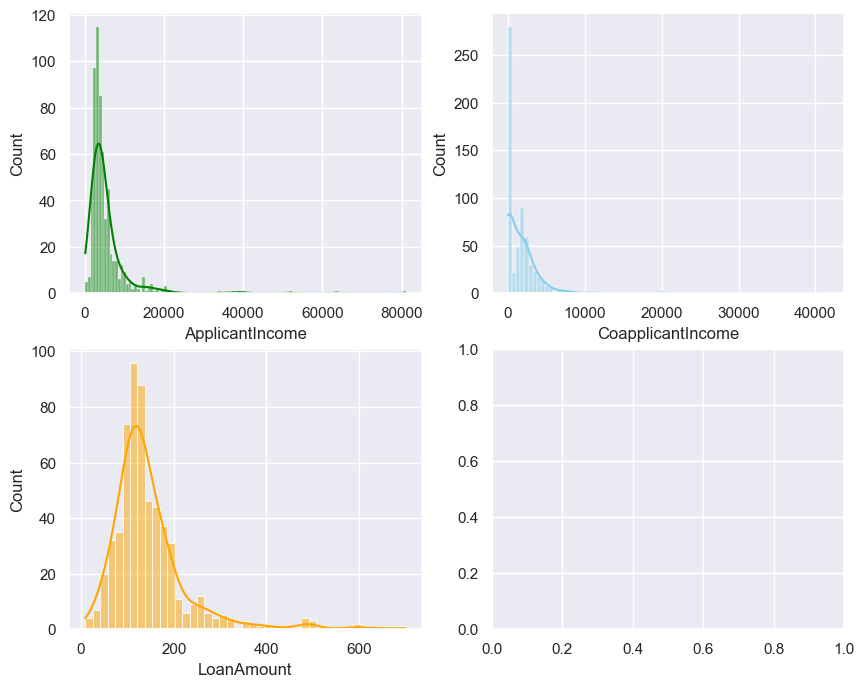

In [20]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

sns.histplot(data=df, x="ApplicantIncome", kde=True, ax=axs[0, 0], color='green')
sns.histplot(data=df, x="CoapplicantIncome", kde=True, ax=axs[0, 1], color='skyblue')
sns.histplot(data=df, x="LoanAmount", kde=True, ax=axs[1, 0], color='orange');

In [21]:
df.drop(["Loan_ID"],axis=1,inplace=True)

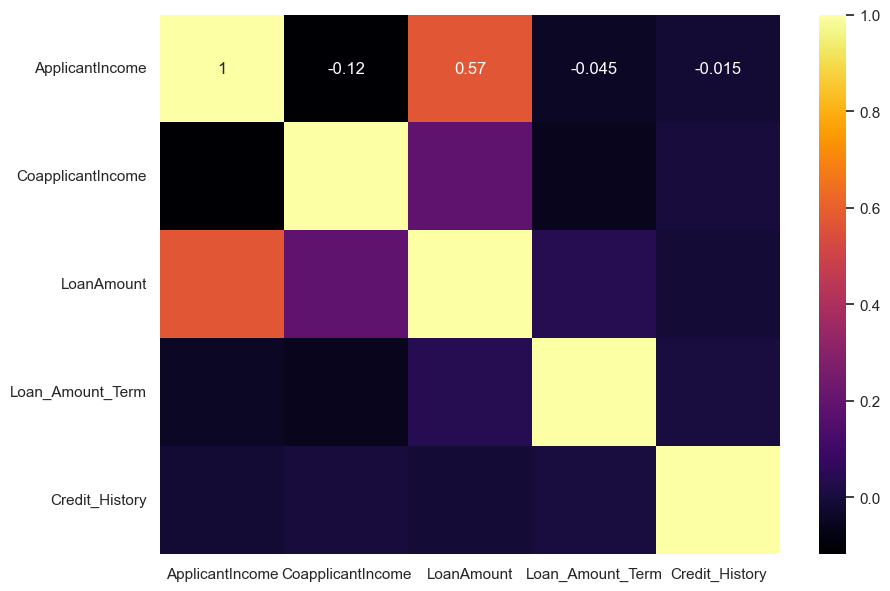

In [22]:
plt.figure(figsize=(10,7))
sns.heatmap(df[cols].corr(), annot=True, cmap='inferno');

In [23]:
pd.crosstab(df.Gender,df.Loan_Status)

Loan_Status,N,Y
Gender,,
Female,37,75
Male,150,339


C:\Users\sansk\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sansk\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sansk\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


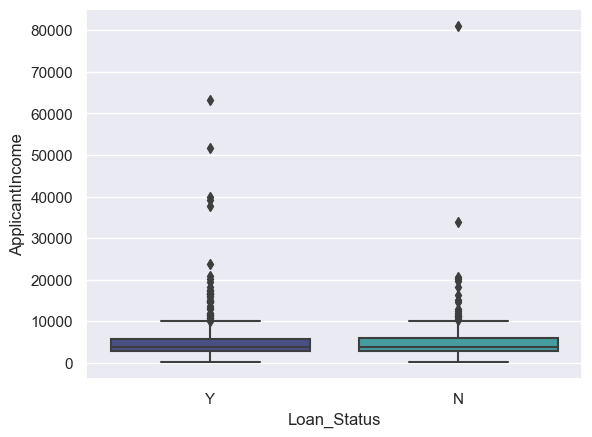

In [24]:
sns.boxplot(x="Loan_Status", y="ApplicantIncome", data=df, palette="mako");


C:\Users\sansk\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sansk\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sansk\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


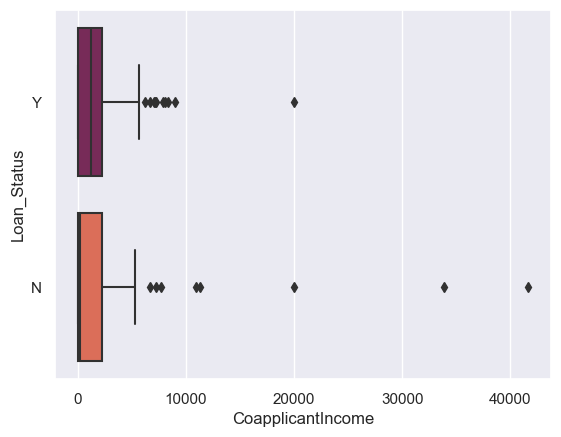

In [25]:
sns.boxplot(x="CoapplicantIncome", y="Loan_Status", data=df, palette="rocket");


C:\Users\sansk\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sansk\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sansk\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


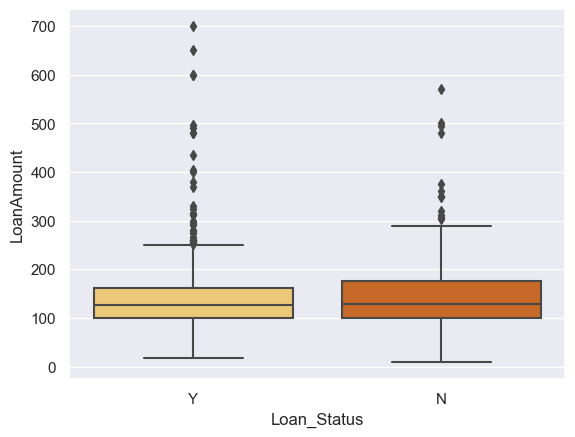

In [26]:
sns.boxplot(x="Loan_Status", y="LoanAmount", data=df, palette="YlOrBr");


# Data Cleaning

In [27]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [28]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)

In [29]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)

In [30]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [31]:
dic1 = {"No":0, "Yes":1,}
dic2 = {"N":0, "Y":1,}
dic3 = {"Male":0,"Female":1,}
dic4 = {"Graduate":0,"Not Graduate":1,}
dic5 = {"Urban":0,"Rural":1,"Semiurban":2}
df["Property_Area"] = df["Property_Area"].map(dic5)
df["Education"]=df["Education"].map(dic4)
df["Gender"] = df["Gender"].map(dic3)
df['Loan_Status'] = df['Loan_Status'].map(dic2)
df['Self_Employed'] = df['Self_Employed'].map(dic1)
df['Married'] = df['Married'].map(dic1)

In [32]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,0,0,0,5849,0.0,146.412162,360.0,1.0,0,1
1,0,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,1,0
2,0,1,0,0,1,3000,0.0,66.000000,360.0,1.0,0,1
3,0,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,0,1
4,0,0,0,0,0,6000,0.0,141.000000,360.0,1.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,1,0,0,0,0,2900,0.0,71.000000,360.0,1.0,1,1
610,0,1,3+,0,0,4106,0.0,40.000000,180.0,1.0,1,1
611,0,1,1,0,0,8072,240.0,253.000000,360.0,1.0,0,1
612,0,1,2,0,0,7583,0.0,187.000000,360.0,1.0,0,1


In [33]:
df["Property_Area"].value_counts()

Property_Area
2    233
0    202
1    179
Name: count, dtype: int64

In [34]:
df = pd.get_dummies(df)

In [35]:
df

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Dependents_0,Dependents_1,Dependents_2,Dependents_3+
0,0,0,0,0,5849,0.0,146.412162,360.0,1.0,0,1,True,False,False,False
1,0,1,0,0,4583,1508.0,128.000000,360.0,1.0,1,0,False,True,False,False
2,0,1,0,1,3000,0.0,66.000000,360.0,1.0,0,1,True,False,False,False
3,0,1,1,0,2583,2358.0,120.000000,360.0,1.0,0,1,True,False,False,False
4,0,0,0,0,6000,0.0,141.000000,360.0,1.0,0,1,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,1,0,0,0,2900,0.0,71.000000,360.0,1.0,1,1,True,False,False,False
610,0,1,0,0,4106,0.0,40.000000,180.0,1.0,1,1,False,False,False,True
611,0,1,0,0,8072,240.0,253.000000,360.0,1.0,0,1,False,True,False,False
612,0,1,0,0,7583,0.0,187.000000,360.0,1.0,0,1,False,False,True,False


In [36]:
col = ['ApplicantIncome','CoapplicantIncome','LoanAmount']
Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1
upper=Q3+1.5*IQR
lower=Q1-1.5*IQR
upper_array = np.where(df[col]>=upper)[0]
lower_array = np.where(df[col]<=lower)[0]
df.drop(index=upper_array, inplace=True)
df.drop(index=lower_array, inplace=True)

In [37]:
# df = df.drop("Loan_ID",axis=1)
df.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Dependents_0,Dependents_1,Dependents_2,Dependents_3+
0,0,0,0,0,5849,0.0,146.412162,360.0,1.0,0,1,True,False,False,False
1,0,1,0,0,4583,1508.0,128.000000,360.0,1.0,1,0,False,True,False,False
2,0,1,0,1,3000,0.0,66.000000,360.0,1.0,0,1,True,False,False,False
3,0,1,1,0,2583,2358.0,120.000000,360.0,1.0,0,1,True,False,False,False
4,0,0,0,0,6000,0.0,141.000000,360.0,1.0,0,1,True,False,False,False


C:\Users\sansk\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sansk\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sansk\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sansk\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na opti

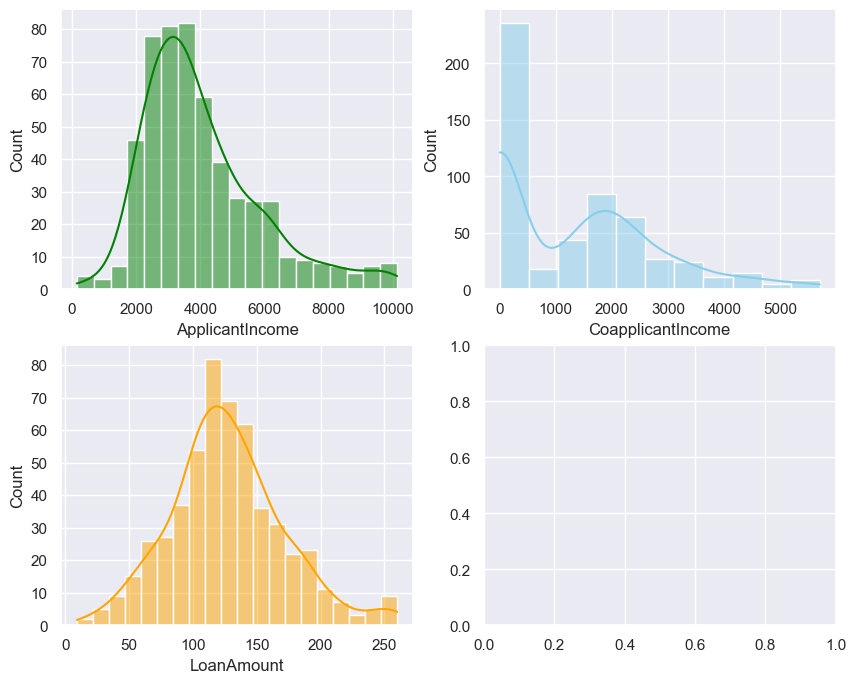

In [38]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

sns.histplot(data=df, x="ApplicantIncome", kde=True, ax=axs[0, 0], color='green')
sns.histplot(data=df, x="CoapplicantIncome", kde=True, ax=axs[0, 1], color='skyblue')
sns.histplot(data=df, x="LoanAmount", kde=True, ax=axs[1, 0], color='orange');

# Training

In [39]:
X = df.drop(["Loan_Status"], axis=1)
y = df["Loan_Status"]

In [40]:
Xs, ys= SMOTE().fit_resample(X, y)

In [41]:
#Normalize the data
X = MinMaxScaler().fit_transform(X)

In [42]:
#Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 48)

In [43]:
#Linear Regression
LRclassifier =LogisticRegression()
LRclassifier.fit(X_train, y_train)

y_pred = LRclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
LRAcc = accuracy_score(y_pred,y_test)
print('LR accuracy: {:.2f}%'.format(LRAcc*100))

              precision    recall  f1-score   support

           0       1.00      0.71      0.83        14
           1       0.91      1.00      0.95        40

    accuracy                           0.93        54
   macro avg       0.95      0.86      0.89        54
weighted avg       0.93      0.93      0.92        54

[[10  4]
 [ 0 40]]
LR accuracy: 92.59%


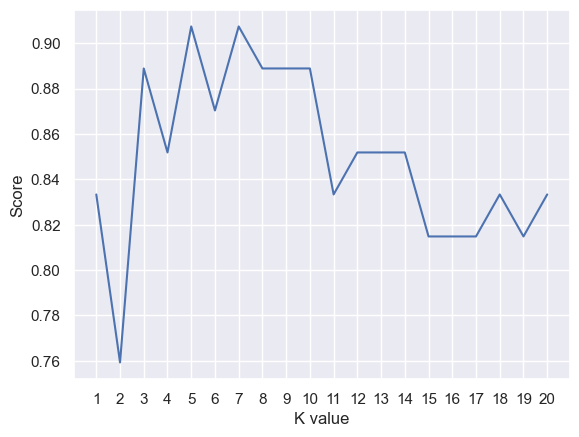

KNN best accuracy: 90.74%


In [50]:
#K Nearest Neighbour
scoreListknn = []
for i in range(1,21):
    KNclassifier = KNeighborsClassifier(n_neighbors = i)
    KNclassifier.fit(X_train, y_train)
    scoreListknn.append(KNclassifier.score(X_test, y_test))
    
plt.plot(range(1,21), scoreListknn)
plt.xticks(np.arange(1,21,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()
KNAcc = max(scoreListknn)
print("KNN best accuracy: {:.2f}%".format(KNAcc*100))

In [51]:
#Support Vector Machine
SVCclassifier = SVC(kernel='rbf', max_iter=500)
SVCclassifier.fit(X_train, y_train)

y_pred = SVCclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
SVCAcc = accuracy_score(y_pred,y_test)
print('SVC accuracy: {:.2f}%'.format(SVCAcc*100))

              precision    recall  f1-score   support

           0       1.00      0.71      0.83        14
           1       0.91      1.00      0.95        40

    accuracy                           0.93        54
   macro avg       0.95      0.86      0.89        54
weighted avg       0.93      0.93      0.92        54

[[10  4]
 [ 0 40]]
SVC accuracy: 92.59%


C:\Users\sansk\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


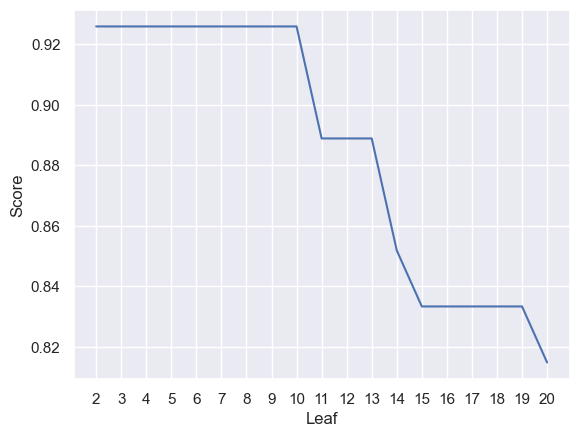

Decision Tree Accuracy: 92.59%


In [52]:
#Decision Tree
scoreListDT = []
for i in range(2,21):
    DTclassifier = DecisionTreeClassifier(max_leaf_nodes=i)
    DTclassifier.fit(X_train, y_train)
    scoreListDT.append(DTclassifier.score(X_test, y_test))
    
plt.plot(range(2,21), scoreListDT)
plt.xticks(np.arange(2,21,1))
plt.xlabel("Leaf")
plt.ylabel("Score")
plt.show()
DTAcc = max(scoreListDT)
print("Decision Tree Accuracy: {:.2f}%".format(DTAcc*100))

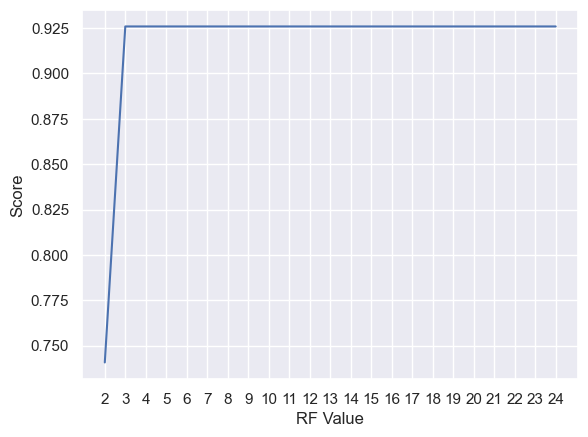

Random Forest Accuracy:  92.59%


In [53]:
#Random Forest 
scoreListRF = []
for i in range(2,25):
    RFclassifier = RandomForestClassifier(n_estimators = 1000, random_state = 1, max_leaf_nodes=i)
    RFclassifier.fit(X_train, y_train)
    scoreListRF.append(RFclassifier.score(X_test, y_test))
    
plt.plot(range(2,25), scoreListRF)
plt.xticks(np.arange(2,25,1))
plt.xlabel("RF Value")
plt.ylabel("Score")
plt.show()
RFAcc = max(scoreListRF)
print("Random Forest Accuracy:  {:.2f}%".format(RFAcc*100))

In [54]:
#For Grid Search
paramsGB={'n_estimators':[100,200,300,400,500],
      'max_depth':[1,2,3,4,5],
      'subsample':[0.5,1],
      'max_leaf_nodes':[2,5,10,20,30,40,50]}

In [55]:
GB = RandomizedSearchCV(GradientBoostingClassifier(), paramsGB, cv=20)
GB.fit(X_train, y_train)

RandomizedSearchCV(cv=20, estimator=GradientBoostingClassifier(),
                   param_distributions={'max_depth': [1, 2, 3, 4, 5],
                                        'max_leaf_nodes': [2, 5, 10, 20, 30, 40,
                                                           50],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500],
                                        'subsample': [0.5, 1]})

In [56]:
print(GB.best_estimator_)
print(GB.best_score_)
print(GB.best_params_)
print(GB.best_index_)

GradientBoostingClassifier(max_depth=2, max_leaf_nodes=2, n_estimators=500,
                           subsample=1)
0.7980833333333333
{'subsample': 1, 'n_estimators': 500, 'max_leaf_nodes': 2, 'max_depth': 2}
4


In [57]:
#Gradient Boosting
GBclassifier = GradientBoostingClassifier(subsample=0.5, n_estimators=400, max_depth=4, max_leaf_nodes=10)
GBclassifier.fit(X_train, y_train)

y_pred = GBclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
GBAcc = accuracy_score(y_pred,y_test)
print('Gradient Boosting accuracy: {:.2f}%'.format(GBAcc*100))

              precision    recall  f1-score   support

           0       0.71      0.71      0.71        14
           1       0.90      0.90      0.90        40

    accuracy                           0.85        54
   macro avg       0.81      0.81      0.81        54
weighted avg       0.85      0.85      0.85        54

[[10  4]
 [ 4 36]]
Gradient Boosting accuracy: 85.19%


In [75]:
#Save all the models for deployment
import pickle
pickle.dump(LRclassifier, open('model.pkl','wb'))
pickle.dump(KNclassifier, open('model2.pkl','wb'))
pickle.dump(SVCclassifier, open('model3.pkl','wb'))
pickle.dump(DTclassifier, open('model4.pkl','wb'))
pickle.dump(RFclassifier, open('model5.pkl','wb'))
pickle.dump(GBclassifier, open('model6.pkl','wb'))

In [76]:
model1 = pickle.load(open('model.pkl','rb'))
model2 = pickle.load(open('model2.pkl','rb'))
model3 = pickle.load(open('model3.pkl','rb'))
model4 = pickle.load(open('model4.pkl','rb'))
model5 = pickle.load(open('model5.pkl','rb'))
model6 = pickle.load(open('model6.pkl','rb'))

In [ ]:
#Ensemblong the models
from sklearn.ensemble import VotingClassifier
final_model = VotingClassifier(
    estimators=[('lr', model1), ('knn', model2), ('svc', model3),('dt', model4),('rf', model5),('gb', model6)], voting='hard')
final_model.fit(X_train, y_train)

C:\Users\sansk\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


VotingClassifier(estimators=[('lr', LogisticRegression(solver='liblinear')),
                             ('knn', KNeighborsClassifier(n_neighbors=20)),
                             ('svc', SVC(max_iter=500)),
                             ('dt', DecisionTreeClassifier(max_leaf_nodes=20)),
                             ('rf',
                              RandomForestClassifier(max_leaf_nodes=24,
                                                     n_estimators=1000,
                                                     random_state=1)),
                             ('gb',
                              GradientBoostingClassifier(max_depth=4,
                                                         max_leaf_nodes=10,
                                                         n_estimators=400,
                                                         subsample=0.5))])

In [80]:
y_pred = model.predict(X_test)
pickle.dump(final_model, open('model.pkl','wb'))

In [81]:
#FInal accuracies
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
Acc = accuracy_score(y_pred,y_test)
print("Final Accuracy: ",Acc*100, "%")

              precision    recall  f1-score   support

           0       1.00      0.71      0.83        14
           1       0.91      1.00      0.95        40

    accuracy                           0.93        54
   macro avg       0.95      0.86      0.89        54
weighted avg       0.93      0.93      0.92        54

[[10  4]
 [ 0 40]]
Final Accuracy:  92.5925925925926 %
